In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['text.usetex'] = True

## Density

In [2]:
# Define the functions

k = 5/2

def g(r):
    return np.log(((1 - 2*c + c**2 + 4*k*r + 2*c*k*r + 3*k**2*r**2) / (3*k*r + 3*k**2*r**2))**((-4 + c)/(-1 + c)))


def rho(r):
    return (1 / (32 * (-1 + c)**2 * np.pi * (1 + c**2 + 4 * k * r + 3 * k**2 * r**2 + 2 * c * (-1 + k * r))**6)) * \
            81 * (-4 + c) * c * k**4 * r**2 * (1 + k * r)**2 * \
            (((1 - 2 * c + c**2 + 4 * k * r + 2 * c * k * r + 3 * k**2 * r**2) / (3 * k * r + 3 * k**2 * r**2))**((3 * c) / (-1 + c))) * \
            (3 + 12 * k * r - 14 * k**2 * r**2 - 116 * k**3 * r**3 - 93 * k**4 * r**4 + 
             c**4 * (3 + 12 * k * r + 4 * k**2 * r**2) + 
             4 * c**3 * (-3 - 12 * k * r + 5 * k**2 * r**2 + 2 * k**3 * r**3) - 
             6 * c**2 * (-3 - 12 * k * r + 11 * k**2 * r**2 - 2 * k**3 * r**3 + 2 * k**4 * r**4) + 
             4 * c * (-3 - 12 * k * r + 14 * k**2 * r**2 + 24 * k**3 * r**3 + 33 * k**4 * r**4))

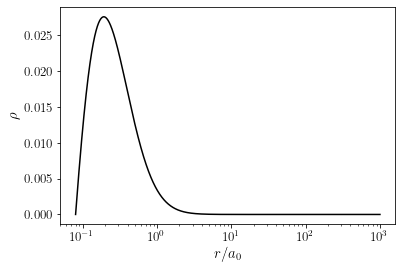

In [3]:
c = 0.4
sigma = (1-c)/(3*k)

kk = 10**-10
start = sigma
end = 10**3
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_values = kk*np.exp(r_vals)


rho_values = [rho(r) for r in r_values]
rho_values = np.nan_to_num(rho_values)

# Plot the results
plt.plot(r_values, rho_values, 'k', label=r'$\rho$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$\rho$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.savefig('..//figures//caseiDens.pdf')
plt.show()

del c

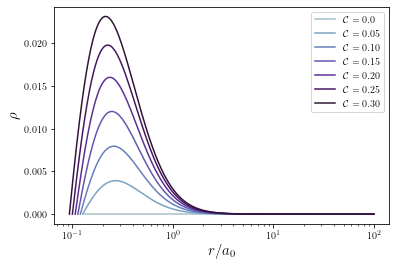

In [4]:
new_c_vals = [10**-40, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
colors = plt.cm.twilight_shifted_r(np.linspace(0.6,1,len(new_c_vals)))

for i in range(len(new_c_vals)):
    c_val = new_c_vals[i]
    c = c_val
    kk = 10**-20
    start = (1-c)/(3*(5/2))
    end = 10**2
    r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**3)
    r_eval = kk*np.exp(r_vals)

    if c_val == 10**-40:
        plt.plot(r_eval, rho(r_eval), label = '$\mathcal C = 0.0$', color=colors[i])
    else:
        plt.plot(r_eval, rho(r_eval), label = '$\mathcal C = {:.2f}$'.format(c), color=colors[i])
plt.xscale('log')
plt.xlabel('$r/a_0$', fontsize = 15)
plt.ylabel(r'$\rho$', fontsize = 15)
plt.legend()
plt.savefig('..//figures//rhovals.pdf')
plt.savefig('..//figures//rhovals.png', dpi = 400)
plt.show()

We can get the location of the peak density values for different $\mathcal{C}$.

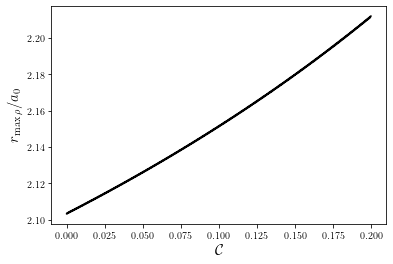

In [5]:
new_c_vals = np.linspace(10**-40,0.2,10**4)
max_rho_vals = []

for i in range(len(new_c_vals)):
    c_val = new_c_vals[i]
    c = c_val
    start = (1-c)/(3*(5/2))
    end = 1
    r_eval = np.linspace(start, end, 10**4)

    max_rho_vals.append(r_eval[rho(r_eval) == np.max(rho(r_eval))]/start)

plt.plot(new_c_vals, max_rho_vals, 'k')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel(r'$r_{\mathrm{max\, \rho}}/a_0$', fontsize = 15)
plt.savefig('..//figures//rhomax.pdf')
plt.savefig('..//figures//rhomax.png', dpi = 400)
plt.show()

## $g_{rr}$ plots

In [6]:
c = 0.4
sigma = (1-c)/(3*k)
#Range of vals

kk = 10**-10
start = sigma
end = 10**3
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_values = kk*np.exp(r_vals)

def grr(r):
    return np.exp(g(r))

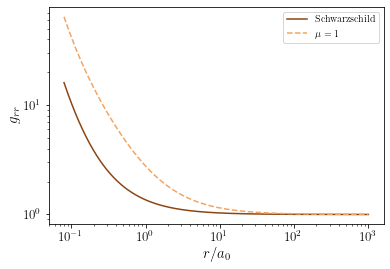

In [7]:
grr_1 = [grr(r) for r in r_values]

# Schwarzschild

grr_schw = [(1+(sigma/r))**4 for r in r_values]

# Plot the results
plt.plot(r_values, grr_schw, c = 'saddlebrown', linestyle ='-', label=r'$\mathrm{Schwarzschild}$')
plt.plot(r_values, grr_1, c = 'sandybrown', linestyle= '--', label=r'$\mu=1$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$g_{rr}$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('..//figures//grrPlot.pdf')
plt.show()

del c

## $g_{tt}$ equation

In [8]:
def gtt(r):
    return 5**((3*(-4 + c)*c)/(2*(-2 + c + c**2))) * \
           27**(c/(2 - 2*c)) * \
           (1 - c)**((3*c)/(4 + 2*c)) * \
           np.exp(((-8 - 23*c + 4*c**2) * (np.pi + 2*np.arctan((-4 + 7*c - 10*r + 10*c*r)/np.sqrt(c*(32 - 49*c + 8*c**2)))))/
                  (2*(2 + c)*np.sqrt(-49 + 32/c + 8*c))) * \
           r**((3*(-4 + c)*c)/(2*(-2 + c + c**2))) * \
           (-2 + 2*c + 15*r)**2 * \
           ((2 + 5*r)/(4 - 8*c + 4*c**2 + 40*r + 20*c*r + 75*r**2))**((-4 + c)/(2*(-1 + c))) * \
           (-2*c**2 + (2 + 5*r)**2 - c*(2 + 35*r + 25*r**2))**(-((3*c)/(4 + 2*c)))

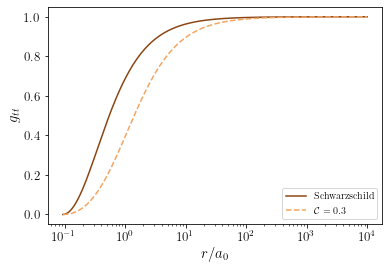

In [9]:
c = 0.3
sigma = (1-c)/(3*k)
#Range of vals

kk = 10**-10
start = sigma
end = 10**4
r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**4)
r_eval = kk*np.exp(r_vals)

schwa = [((1-(sigma/r))/(1+(sigma/r)))**2 for r in r_eval]

# Plot the solution
plt.plot(r_eval, schwa, c = 'saddlebrown', linestyle ='-', label=r'$\mathrm{Schwarzschild}$')
plt.plot(r_eval, gtt(r_eval),  c = 'sandybrown', linestyle ='--', label='$\mathcal{C}=0.3$')
plt.xlabel('$r/{a_0}$', fontsize = 15)
plt.ylabel(r'$g_{tt}$', fontsize = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xscale('log')
plt.legend(loc = 'lower right')
plt.savefig('..//figures//gtt.pdf')
plt.show()

del c

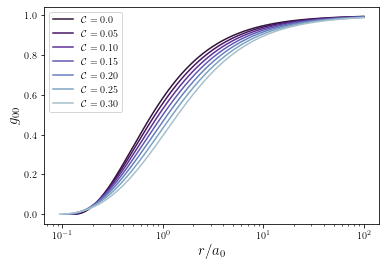

In [10]:
new_c_vals = [10**-40, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
colors = plt.cm.twilight_shifted(np.linspace(0,0.4,len(new_c_vals)))

for i in range(len(new_c_vals)):
    c_val = new_c_vals[i]
    c = c_val
    kk = 10**-20
    start = (1-c)/(3*(5/2))
    end = 10**2
    r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**3)
    r_eval = kk*np.exp(r_vals)

    if c_val == 10**-40:
        plt.plot(r_eval, gtt(r_eval), label = '$\mathcal C = 0.0$', color=colors[i])
    else:
        plt.plot(r_eval, gtt(r_eval), label = '$\mathcal C = {:.2f}$'.format(c), color=colors[i])
plt.xscale('log')
plt.xlabel('$r/a_0$', fontsize = 15)
plt.ylabel(r'$g_{00}$', fontsize = 15)
plt.legend()
plt.savefig('..//figures//gttfam.pdf')
plt.savefig('..//figures//gttfam.png', dpi = 400)
plt.show()

## Effective Potential

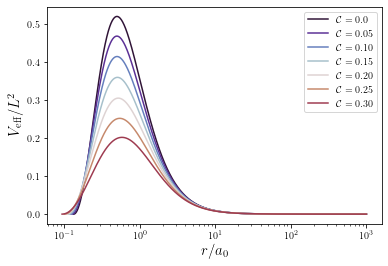

In [11]:
def v_eff(r):
    return gtt(r)/(np.exp(g(r))*r**2)

new_c_vals = [10**-30, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
colors = plt.cm.twilight_shifted(np.linspace(0,0.8,len(new_c_vals)))

for i in range(len(new_c_vals)):
    c_val = new_c_vals[i]
    c = c_val
    kk = 10**-20
    start = (1-c)/(3*(5/2))
    end = 10**3
    r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**3)
    r_eval = kk*np.exp(r_vals)

    if c_val == 10**-30:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = 0.0$', color=colors[i])
    else:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = {:.2f}$'.format(c), color=colors[i])
plt.xscale('log')
plt.xlabel('$r/a_0$', fontsize = 15)
plt.ylabel('$V_\mathrm{{eff}}/L^2$', fontsize = 15)
plt.legend()
plt.savefig('..//figures//veff.pdf', bbox_inches = 'tight')
plt.savefig('..//figures//veff.png', dpi=400 , bbox_inches = 'tight')
plt.show()

## Light Ring

Define relevant quantities.

In [12]:
def f_prime(r):
    return ((-4 + c) * (-12 * k * r * (1 + k * r)**4 + c**5 * (3 + 8 * k * r + 4 * k**2 * r**2) + 
          4 * c**4 * (-3 - 5 * k * r + 5 * k**2 * r**2 + 4 * k**3 * r**3) - 
          c * (1 + k * r)**2 * (-3 - 26 * k * r - 75 * k**2 * r**2 + 12 * k**3 * r**3) + 
          6 * c**3 * (3 + 4 * k * r - 3 * k**2 * r**2 + 10 * k**3 * r**3 + 6 * k**4 * r**4) + 
          4 * c**2 * (-3 - 8 * k * r - 22 * k**2 * r**2 - 42 * k**3 * r**3 - 3 * k**4 * r**4 + 6 * k**5 * r**5))) / \
        (2 * (-1 + c) * r * (1 + k * r) * (1 + c**2 + 4 * k * r + 3 * k**2 * r**2 + 2 * c * (-1 + k * r)) * 
         (c**3 + 2 * c**2 * k * r * (5 + k * r) - 2 * (1 + k * r)**2 * (-1 + 3 * k * r) + 
          c * (-3 - 8 * k * r + 17 * k**2 * r**2 + 6 * k**3 * r**3)))

def g_prime(r):
    return -(((-4 + c) * ((1 + k * r)**2 + c**2 * (1 + 2 * k * r) + 
           2 * c * (-1 - 2 * k * r + k**2 * r**2))) / 
         ((-1 + c) * r * (1 + k * r) * (1 + c**2 + 4 * k * r + 3 * k**2 * r**2 + 2 * c * (-1 + k * r))))

def lr_eqn(r):
    return -2+r*f_prime(r)-r*g_prime(r)

def circ_lr(r):
    return 2*np.pi*r*np.sqrt(grr(r))

def circum(r):
    return 2*np.pi*np.sqrt(grr(r))

def ehr(c):
    return 2*(1-c)/15

The light ring must be given by

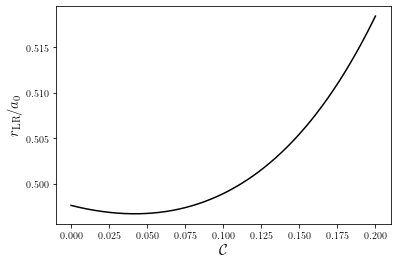

In [13]:
c_vals = np.linspace(10**-20, 0.2, 10**4)

lr_vals_1 = []

for c_val in c_vals:
    c = c_val
    lr_vals_1.append(*fsolve(lr_eqn, 0.5))

def lr_app(c):
    return 2/15 * (2 + np.sqrt(3)) + ((-47 - 61 * np.sqrt(3)) * c)/3630 + (3 * (93033 + 82303 * np.sqrt(3)) * c**2)/1610510 
plt.plot(c_vals, lr_vals_1, c = 'black')
# plt.plot(c_vals, lr_app(c_vals), c = 'gray', linestyle = '--')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$r_{\mathrm{LR}}/a_0$', fontsize = 15)
plt.savefig('..//figures//LightRingPlot.pdf', bbox_inches = 'tight')
plt.savefig('..//figures//LightRingPlot.png', dpi = 400, bbox_inches = 'tight')
plt.show()

Increasing the compactness decreases the size of the black hole. We can interpret this as the light ring following the black hole horizon until the increasing mass within it dominates and makes it expand.

# Angular frequency at $r_{\mathrm{LR}}$

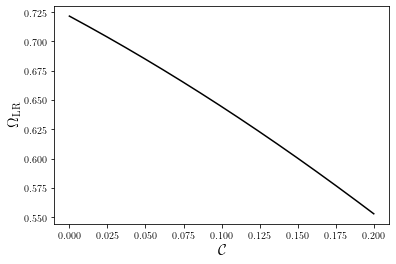

In [14]:
om_1 = []

for i in range(len(lr_vals_1)):
    c = c_vals[i]
    om_1.append(np.sqrt(gtt(lr_vals_1[i])/(np.exp(g(lr_vals_1[i]))*lr_vals_1[i]**2)))

plt.plot(c_vals, om_1, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$\Omega_{\mathrm{LR}}$', fontsize = 15)
plt.savefig('..//figures//AngFreqPlot.pdf', bbox_inches = 'tight')
plt.show()

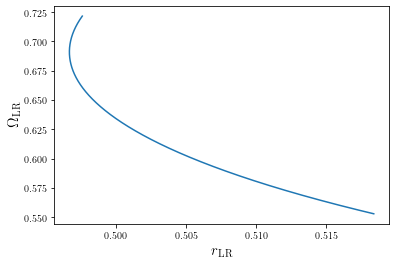

In [15]:
plt.plot(lr_vals_1, om_1)
plt.xlabel('$r_{\mathrm{LR}}$', fontsize = 15)
plt.ylabel('$\Omega_{\mathrm{LR}}$', fontsize = 15)
plt.show()

This looks anomalous since the radius of the light ring initially decreases. Let's look at the circumference of the light ring.

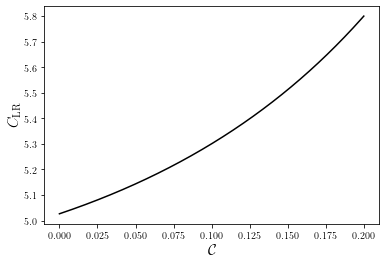

In [16]:
circum = []

for i in range(len(lr_vals_1)):
    c = c_vals[i]
    circum.append(2*np.pi*lr_vals_1[i]*np.sqrt(grr(lr_vals_1[i])))

plt.plot(c_vals, circum, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$C_{\mathrm{LR}}$', fontsize = 15)
plt.savefig('..//figures//Circum.pdf', bbox_inches = 'tight')
plt.show()

Even if the light ring radius go down, the matter content increases the circumference of the light ring.

# Impact Parameter

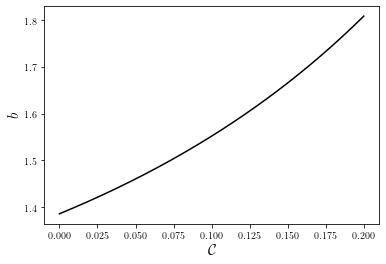

In [17]:
imp_1 = []

for i in range(len(lr_vals_1)):
    imp_1.append(1/om_1[i])

plt.plot(c_vals, imp_1, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$b$', fontsize = 15)
plt.savefig('..//figures//ImpactParameter.pdf', bbox_inches = 'tight')
plt.savefig('..//figures//ImpactParameter.png', dpi = 400, bbox_inches = 'tight')
plt.show()

## Extra figures

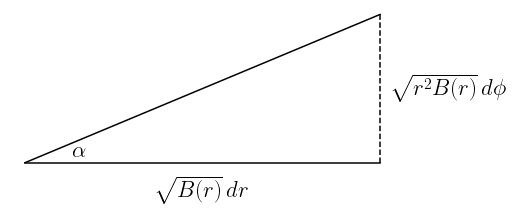

In [18]:
plt.figure(figsize=(7,3))
plt.plot([0, 15], [0, 0], 'k')  # Base
plt.plot([15, 15], [0,5], 'k--')  # Opposite side (dashed)
plt.plot([0, 15], [0, 5], 'k')  # Hypotenuse

plt.text(7.5, -1.15, r'$\sqrt{B(r)}\,dr$', fontsize=23, ha='center')
plt.text(15.5, 2.5, r'$\sqrt{r^2 B(r)}\,d\phi$', fontsize=23, va='center')
plt.text(2, 0.20, r'$\alpha$', fontsize=23)  # Label for vertex

plt.axis('off')
plt.savefig('..//figures//angular.pdf',bbox_inches='tight')
plt.show()


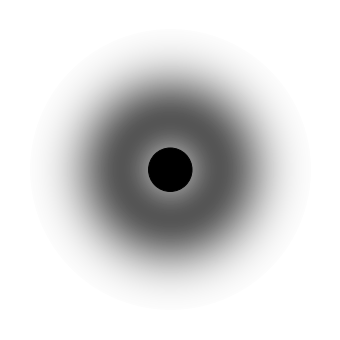

In [19]:
radius = 50
sigma = 10

x = np.linspace(-radius, radius, 2*radius**2)
y = np.linspace(-radius, radius, 2*radius**2)
X, Y = np.meshgrid(x, y)

distances = np.sqrt(X**2 + Y**2)

intensity = np.exp(-(distances-15)**2 / (2 * sigma**2))
intensity[intensity < 0.02] = 0

plt.figure(figsize=(6, 6))
circle = plt.Circle((0, 0), 10, color='black', fill=True)
plt.gca().add_artist(circle)
plt.imshow(intensity, extent=(-1.5*radius, 1.5*radius, -1.5*radius, 1.5*radius),cmap='gray_r', vmax=1.5, origin='lower')
plt.axis('off')

plt.savefig('..//figures//blackhole.pdf', bbox_inches = 'tight', pad_inches = -0.2)
plt.show()

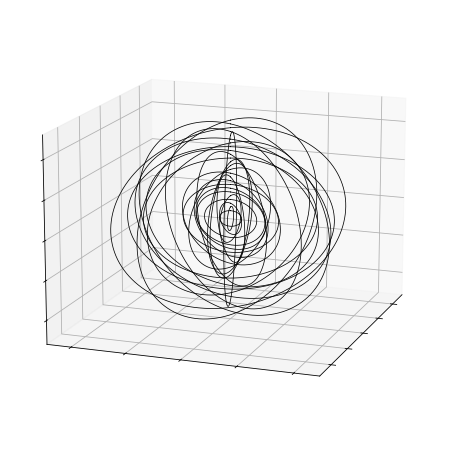

In [20]:



num_orbits = 25  # Number of orbits
num_points = 1000  # Number of points on each orbit
radii = np.linspace(1, num_orbits/2, num_orbits)  

np.random.seed(10)  
inclinations = [np.random.rand(1)*2*np.pi for i in range(num_orbits)]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for r, inc in zip(radii, inclinations):
    theta = np.linspace(0, 2*np.pi, num_points)
    z = r * np.cos(theta)
    x = r * np.sin(theta) * np.cos(inc)
    y = r * np.sin(theta) * np.sin(inc)
    ax.plot(x, y, z, color = 'black', linewidth = 0.75)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# ax.set_title('Concentric Orbits with Random Inclination Angles in 3D')

# ax.legend()
# plt.axis('off')
ax.view_init(elev=15, azim=20)


# ax.grid(False)

# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])


plt.savefig('..//figures//einsclus.pdf', bbox_inches = 'tight', pad_inches = -0.3)
plt.show()


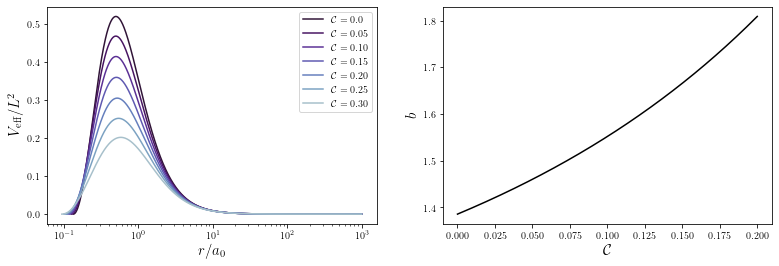

In [21]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
def v_eff(r):
    return gtt(r)/(np.exp(g(r))*r**2)

new_c_vals = [10**-30, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
colors = plt.cm.twilight_shifted(np.linspace(0,0.4,len(new_c_vals)))

for i in range(len(new_c_vals)):
    c_val = new_c_vals[i]
    c = c_val
    kk = 10**-20
    start = (1-c)/(3*(5/2))
    end = 10**3
    r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**3)
    r_eval = kk*np.exp(r_vals)

    if c_val == 10**-30:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = 0.0$', color=colors[i])
    else:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = {:.2f}$'.format(c), color=colors[i])
plt.xscale('log')
plt.xlabel('$r/a_0$', fontsize = 15)
plt.ylabel('$V_\mathrm{{eff}}/L^2$', fontsize = 15)
plt.legend()

plt.subplot(1,2,2)
plt.plot(c_vals, imp_1, c = 'black')
plt.xlabel('$\mathcal{C}$', fontsize = 15)
plt.ylabel('$b$', fontsize = 15)

plt.savefig('..//figures//veffimp.pdf', bbox_inches = 'tight')
plt.show()

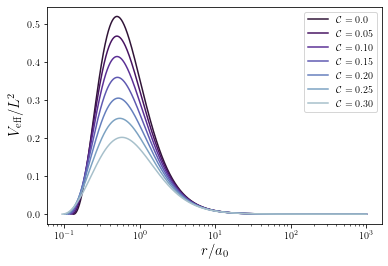

In [22]:
def v_eff(r):
    return gtt(r)/(np.exp(g(r))*r**2)

new_c_vals = [10**-30, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3]
colors = plt.cm.twilight_shifted(np.linspace(0,0.4,len(new_c_vals)))

for i in range(len(new_c_vals)):
    c_val = new_c_vals[i]
    c = c_val
    kk = 10**-20
    start = (1-c)/(3*(5/2))
    end = 10**3
    r_vals = np.linspace(np.log(start/kk), np.log(end/kk), 10**3)
    r_eval = kk*np.exp(r_vals)

    if c_val == 10**-30:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = 0.0$', color=colors[i])
    else:
        plt.plot(r_eval, v_eff(r_eval), label = '$\mathcal C = {:.2f}$'.format(c), color=colors[i])
plt.xscale('log')
plt.xlabel('$r/a_0$', fontsize = 15)
plt.ylabel('$V_\mathrm{{eff}}/L^2$', fontsize = 15)
plt.legend()
plt.savefig('..//figures//veff.pdf')
plt.savefig('..//figures//veff.png', dpi = 400)
plt.legend()